# Lab02: Gradient Descent.

- Student ID: 20127370
- Student name: Mai Quý Trung

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Forward & Backward

In this section, you will be asked to fill in the black to form the forward process and backward process with the data defined as follows:

- Feature: $X$ (shape: $n\times d$, be already used bias trick)
- Label: $y$ (shape: $n\times 1$)
- Weight: $W$ (shape: $d\times 1$)

### 3.1. Forward

**TODO**: Fill in the blank

$$
h = XW \Rightarrow \frac{\partial h}{\partial W} = X
$$

$$
\hat{y} = \sigma(h) \Rightarrow \frac{\partial \hat{y}}{\partial h} = \sigma'(h) = {\sigma (h)} * (1 - {\sigma (h)})
$$

$$
Loss = \frac{1}{2}(\hat{y} - y)^2 \Rightarrow \frac{\partial Loss}{\partial \hat{y}} = \hat{y} - y = \sigma(h) - y
$$

### 3.2. Backward

**Goal**: Compute $\nabla Loss = \frac{\partial Loss(W)}{\partial W}$

**How to compute $\nabla Loss$?**: Use Chain-rule. Your work is to fill in the blank

**TODO**: Fill in the blank
$$
\nabla Loss = \frac{\partial Loss(W)}{\partial W} = \frac{\partial Loss}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial h} * \frac{\partial h}{\partial W} = (\sigma'(h) - y) * \sigma(h) * (1 - {\sigma (h)}) * X
$$
$$

## 4. Implementation

### 4.1. Import library

In [1]:
using MLJ, DataFrames, VegaLite, Distributions, Plots

# import your libraries if needed

### 4.2. Create data

In [2]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
X, y = make_blobs(1000, 2, centers=2, cluster_std=0.5, rng=1)
df = DataFrame(X)
df.y = convert(Vector{Float64}, y) .- 1

# insert a column of 1’s as the last entry in the feature matrix  
# -- allows us to treat the bias as a trainable parameter
df.x3 = ones(size(df)[1],)
println(first(df, 5))

# Split data, use 50% of the data for training and the remaining 50% for testing
df_train, df_test = partition(df, 0.5)
println(size(df_train), size(df_test))
X_train, y_train = [df_train.x1 df_train.x2 df_train.x3], df_train.y
X_test, y_test = [df_test.x1 df_test.x2 df_test.x3], df_test.y;

5×4 DataFrame
 Row │ x1        x2         y        x3      
     │ Float64   Float64    Float64  Float64 
─────┼───────────────────────────────────────
   1 │ -5.26015   -3.40971      0.0      1.0
   2 │ -4.79323   -4.21907      0.0      1.0
   3 │ -5.30122   -2.28391      0.0      1.0
   4 │ -3.32932  -10.9598       1.0      1.0
   5 │ -2.60354   -9.87621      1.0      1.0


(500, 4)(500, 4)


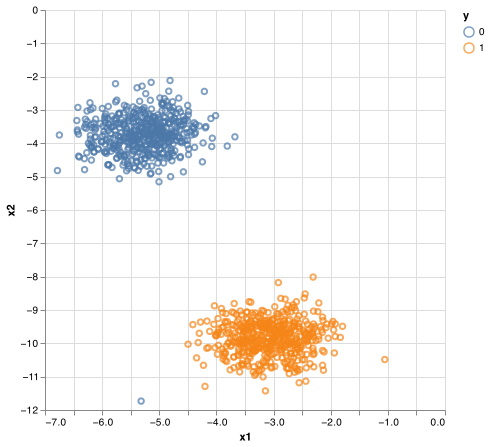

In [3]:
df |> @vlplot(
    :point, 
    x=:x1, y=:x2, 
    color = :"y:n",
    width=400,height=400
)

### 4.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [4]:
function sigmoid_activation(x)
    #TODO
    """compute the sigmoid activation value for a given input"""
    z = -x
    σ_value = 1.0 ./ (1 .+ exp.(z))
    return σ_value
    #return?

end

function sigmoid_deriv(x)
    #TODO
    """
    Compute the derivative of the sigmoid function ASSUMING
    that the input 'x' has already been passed through the sigmoid
    activation function
    """
    σ_deriv = x .* (1 .- x)
    return σ_deriv
    #return?

end

sigmoid_deriv (generic function with 1 method)

#### Compute output

In [5]:
function compute_h(W, X)
    #TODO
    """
    Compute output: Take the inner product between our features 'X' and the weight
    matrix 'W', then pass this value through our sigmoid activation function 
    """
    h = X * W
    return h
    # return?

end

function predict(W, X)
    #TODO
    """
    Take the inner product between our features and weight matrix, 
    then pass this value through our sigmoid activation
    """
    # preds = ...
    h = compute_h(W, X)
    preds = sigmoid_activation(h)
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds .<= 0.5] .= 0
    preds[preds .> 0] .= 1

    return preds
end

predict (generic function with 1 method)

#### Compute gradient

In [6]:
function compute_gradient(error, y_hat, trainX)
    #TODO 
    """
    the gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of
    our predictions
    """
    loss = error .* sigmoid_deriv(y_hat)
    grad = transpose(trainX) * loss
    return grad
    # return?
    
end

compute_gradient (generic function with 1 method)

#### Training function 

In [7]:
function train(W, trainX, trainY, learning_rate, num_epochs)
    losses = []
    for epoch in 1:num_epochs
        y_hat = sigmoid_activation(compute_h(W, trainX))
        # now that we have our predictions, we need to determine the
        # 'error', which is the difference between our predictions and
        # the true values
        error = y_hat - trainY
        append!(losses, 0.5 * sum(error .^ 2))
        grad = compute_gradient(error, y_hat, trainX)
        W -= learning_rate * grad

        if epoch == 1 || epoch % 5 == 0
            println("Epoch=$epoch; Loss=$(losses[end])")
        end
    end
    return W, losses
end

train (generic function with 1 method)

#### Initialize our weight matrix and Train our model

Epoch=1; Loss=124.66483792311352
Epoch=5; Loss=128.48105108801946
Epoch=10; Loss=128.47191739719148
Epoch=15; Loss=128.44685792439876
Epoch=20; Loss=128.2225034737451
Epoch=25; Loss=0.5000181379024724
Epoch=30; Loss=0.5000180431174561
Epoch=35; Loss=0.5000179485377679
Epoch=40; Loss=0.5000178541616553
Epoch=45; Loss=0.5000177599873783
Epoch=50; Loss=0.5000176660132082
Epoch=55; Loss=0.5000175722374279
Epoch=60; Loss=0.5000174786583318
Epoch=65; Loss=0.5000173852742258
Epoch=70; Loss=0.5000172920834265
Epoch=75; Loss=0.5000171990842619
Epoch=80; Loss=0.5000171062750707
Epoch=85; Loss=0.500017013654202
Epoch=90; Loss=0.5000169212200164
Epoch=95; Loss=0.5000168289708841
Epoch=100; Loss=0.5000167369051864


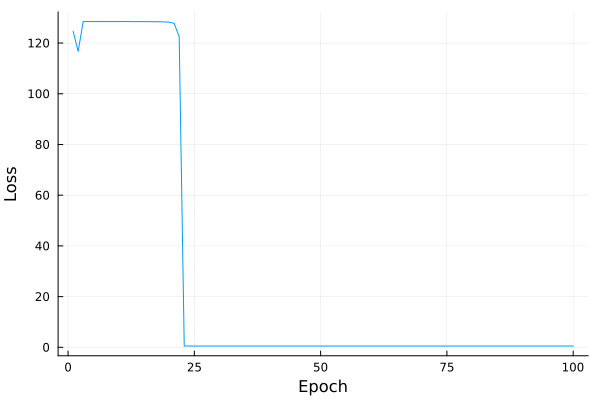

In [16]:
W = rand(Normal(), (size(X_train)[2], 1))

num_epochs=100
learning_rate=0.1
W, losses = train(W, X_train, y_train, learning_rate, num_epochs)
plot(1:num_epochs, losses, legend=false, xlabel="Epoch", ylabel="Loss")

#### Evaluate result

In [17]:
preds = predict(W, X_test)
acc = accuracy(preds, reshape(y_test, length(y_test), 1))
p = precision(preds, reshape(y_test, length(y_test), 1))
r = recall(preds, reshape(y_test, length(y_test), 1))
f1 = 2*p*r/(p + r)
print("acc: $acc, precision: $p, recall: $r, f1_score: $f1\n")

acc: 1.0, precision: 1.0, recall: 1.0, f1_score: 1.0


┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116
┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116


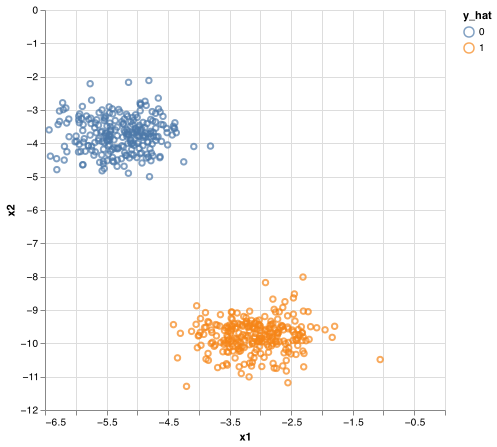

In [18]:
# visualize the result of predictions
df_test.y_hat = reshape(preds, (length(preds),))
df_test |> @vlplot(
    :point, 
    x=:x1, y=:x2, 
    color = :"y_hat:n",
    width=400,height=400
)

**TODO: Study about accuracy, recall, precision, f1-score.**
- Accuracy: This is the percentage of how accurate the model predict on the test data
- Recall: This is the fraction of true positive data (TP) among the sum of false negative data (FN) and true positive data => (TP/(FN + TP))
- Precision: This is the fraction of true positive data (TP) among the sum of false positive data (FP) and true positive data => (TP/(FP + TP))
- F1: This is a measure of a model's accuracy on a dataset by combining the precision and recall of the model, defined as the harmonic mean of the model's precision and recall => (2 * precision * recall) / (precision + recall)
##### With learning rate 0.1 and predict data above:
- Most of the times the weight cannot find the lowest spot, accuracy will be about 48% to 51%, precision will be NaN, recall 0.0 and therefore f1 score is also NaN.
- Precision is NaN due to there is 0 true positive data and 0 false positive data, which makes f1 score to be NaN as well
- In my own testing experience, in 20 attempts, there will be about 1 or 2 times that the weight will luckily be randomized at around the lowest spot, which makes the loss lower and create high accuracy.

**TODO: Try out different learning rates. Give me your observations**

Observations after trying out different learning rate:
- Tested learning rate: from 0.01 -> 0.09, 0.01 -> 0.09, 0.001 -> 0.009
- At 0.1 -> 0.9: Since learning rate in this range is high, the weight cannot update its value in the correct spot therefore the loss is still very high after 100 epochs and accuracy and recall is very low, precision is NaN since there is 0 true positive data and 0 false positive data, therefore, the f1 score is also NaN
- At 0.01 -> 0.09: The model weight works best at learning rate 0.01 since the smaller the learning rate, the higher accuracy for the weight to drop in the lowest spot to make the loss lower and create better model, therefore, all of the accuracy, precision, recall and f1 score is all 1.0
- At 0.001 -> 0.009 (< 0.01): Learning rate lower than 0.01 will also has high accuracy for the wegiht to drop in the lowest spot the reduce the loss but it can lead to a situation of overfitting the dataset. Therfore, very low learning rate is not that perfect

##### <b>learning_rate = 0.1</b>

Epoch=1; Loss=128.49611238932852
Epoch=5; Loss=128.49588575217638
Epoch=10; Loss=128.4955622048805
Epoch=15; Loss=128.49518320391127
Epoch=20; Loss=128.49473316200567
Epoch=25; Loss=128.49419005453075
Epoch=30; Loss=128.49352171994948
Epoch=35; Loss=128.49267928334353
Epoch=40; Loss=128.49158471109433
Epoch=45; Loss=128.4901053398446
Epoch=50; Loss=128.4879961879111
Epoch=55; Loss=128.48475013391632
Epoch=60; Loss=128.479124015975
Epoch=65; Loss=128.4670824332381
Epoch=70; Loss=128.42497426997323
Epoch=75; Loss=121.5959857754043
Epoch=80; Loss=121.49999938474218
Epoch=85; Loss=121.49999938472352
Epoch=90; Loss=121.49999938470488
Epoch=95; Loss=121.49999938468623
Epoch=100; Loss=121.49999938466756
acc: 0.486, precision: NaN, recall: 0.0, f1_score: NaN


┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116
┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116


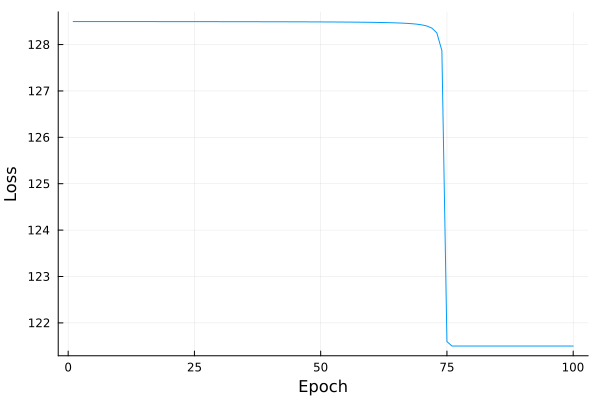

In [11]:
weight = rand(Normal(), (size(X_train)[2], 1))

learning_rate = 0.1
weight, losses = train(weight, X_train, y_train, learning_rate, num_epochs)
preds = predict(weight, X_test)
acc = accuracy(preds, reshape(y_test, length(y_test), 1))
p = precision(preds, reshape(y_test, length(y_test), 1))
r = recall(preds, reshape(y_test, length(y_test), 1))
f1 = 2*p*r/(p + r)
print("acc: $acc, precision: $p, recall: $r, f1_score: $f1\n")
plot(1:num_epochs, losses, legend=false, xlabel="Epoch", ylabel="Loss")

##### <b>learning_rate = 0.01</b>

Epoch=1; Loss=220.97114634801932
Epoch=5; Loss=124.14365661727615
Epoch=10; Loss=0.539368176900146
Epoch=15; Loss=0.5312996283486875
Epoch=20; Loss=0.5258402072546144
Epoch=25; Loss=0.5218856974335989
Epoch=30; Loss=0.5188766897362062
Epoch=35; Loss=0.516499671934477
Epoch=40; Loss=0.5145653616844327
Epoch=45; Loss=0.5129527307812858
Epoch=50; Loss=0.5115807711276575
Epoch=55; Loss=0.5103931917602207
Epoch=60; Loss=0.5093496299393451
Epoch=65; Loss=0.508420356490545
Epoch=70; Loss=0.5075829554972942
Epoch=75; Loss=0.5068201694209227
Epoch=80; Loss=0.5061184582938135
Epoch=85; Loss=0.5054670107233964
Epoch=90; Loss=0.5048570488481293
Epoch=95; Loss=0.5042813292320291
Epoch=100; Loss=0.5037337771321032
acc: 1.0, precision: 1.0, recall: 1.0, f1_score: 1.0


┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116
┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116


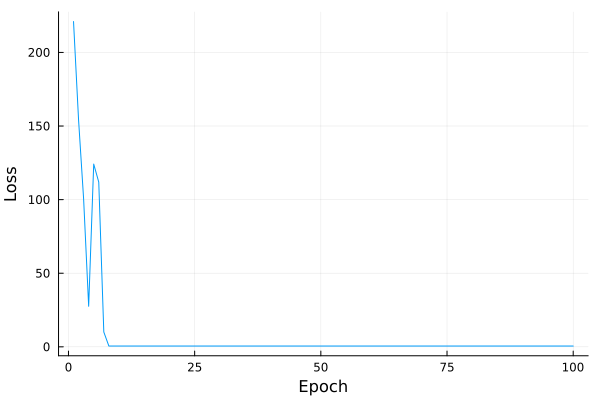

In [12]:
weight = rand(Normal(), (size(X_train)[2], 1))

learning_rate = 0.01
weight, losses = train(weight, X_train, y_train, learning_rate, num_epochs)
preds = predict(weight, X_test)
acc = accuracy(preds, reshape(y_test, length(y_test), 1))
p = precision(preds, reshape(y_test, length(y_test), 1))
r = recall(preds, reshape(y_test, length(y_test), 1))
f1 = 2*p*r/(p + r)
print("acc: $acc, precision: $p, recall: $r, f1_score: $f1\n")
plot(1:num_epochs, losses, legend=false, xlabel="Epoch", ylabel="Loss")

Epoch=1; Loss=121.3185045655941
Epoch=5; Loss=121.30405013798952
Epoch=10; Loss=121.28240516820213
Epoch=15; Loss=121.2554179617771
Epoch=20; Loss=121.22084653052225
Epoch=25; Loss=121.17499952454473
Epoch=30; Loss=121.11134874525112
Epoch=35; Loss=121.01718597569399
Epoch=40; Loss=120.86416420225328
Epoch=45; Loss=120.5742672648129
Epoch=50; Loss=119.83478862532374
Epoch=55; Loss=115.37553938555045
Epoch=60; Loss=4.427848379730012
Epoch=65; Loss=3.369607811304794
Epoch=70; Loss=2.857021692876184
Epoch=75; Loss=2.4952577446774673
Epoch=80; Loss=2.226516653421413
Epoch=85; Loss=2.019145047355719
Epoch=90; Loss=1.854354521090091
Epoch=95; Loss=1.7202989706389886
Epoch=100; Loss=1.6091441617032765
acc: 1.0, precision: 1.0, recall: 1.0, f1_score: 1.0


┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116
┌ Warning: The classes are un-ordered,
│ using: negative='0.0' and positive='1.0'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /Users/quytrungg/.julia/packages/MLJBase/U4Dis/src/measures/confusion_matrix.jl:116


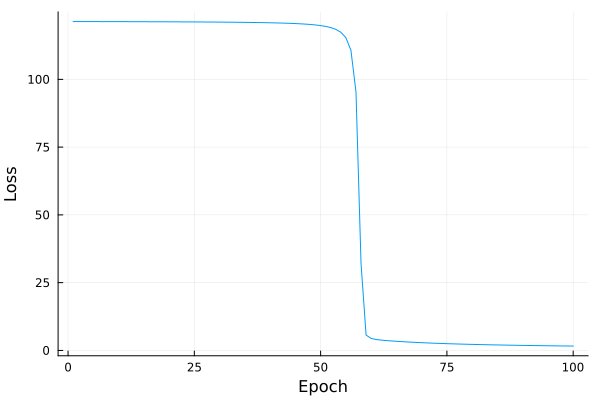

In [14]:
weight = rand(Normal(), (size(X_train)[2], 1))

learning_rate = 0.001
weight, losses = train(weight, X_train, y_train, learning_rate, num_epochs)
preds = predict(weight, X_test)
acc = accuracy(preds, reshape(y_test, length(y_test), 1))
p = precision(preds, reshape(y_test, length(y_test), 1))
r = recall(preds, reshape(y_test, length(y_test), 1))
f1 = 2*p*r/(p + r)
print("acc: $acc, precision: $p, recall: $r, f1_score: $f1\n")
plot(1:num_epochs, losses, legend=false, xlabel="Epoch", ylabel="Loss")